In [49]:
import shallow_water as sw
import wave_simulation as wav
import parmap
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N_t =35000, last simulation time: 251.22656211372887


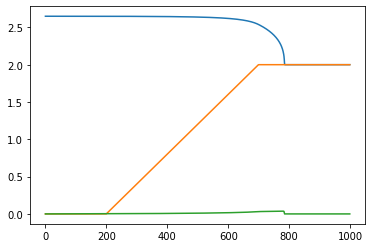

In [10]:
N_t = 35000
# t_search = np.arange(1,100+0.1,0.5)
max_ux,max_x,max_t,last_t = wav.sim_max_u_x(10000,N_t,1)
print(f'N_t ={N_t}, last simulation time:',last_t)
print(f'When arrive maximum speed {last_t}s')

In [12]:
max_x
# plt.plot()


0.2002002002002002

In [13]:
N_t = 100000

t_search = np.arange(1,100+0.1,0.5)
h_list, u_list, t_list, h_check, u_check = sw.Shallow_water_check(100,N_t,1)
print(f'N_t ={N_t}, last simulation time:',t_list[-1])

N_t =100000, last simulation time: 1452.04018784146


268.10722498951725

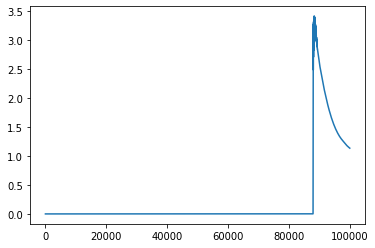

In [14]:
plt.plot(np.array(h_list)[:,-1])
t_list[np.where(np.array(h_list)[:,-1]>0)[0][0]]

In [124]:
cSt_list = np.logspace(0,4,40)
# cSt_list = np.linspace(1,10000,40)
# N_t = 36000
max_u_ensemble= []
last_t_list =  []
t_search = np.arange(1,100+0.1,0.5)
for i in range(1):
    max_u = []
    max_u_t = []
    t_lists = []
    h_lists = []
    u_lists = []
    for S in parmap.map(sw.Shallow_water_check,cSt_list,N_t,t_search,Draw=False,pm_pbar=True, pm_processes=10):
        h_list, u_list, t_list, h_check, u_check = S       
        last_t = t_list[np.where(np.array(h_list)[:,-1]>0)[0][0]]
        last_t_list.append(last_t)
        max_u_t.append(np.max(u_list))
        max_u.append(np.max(u_check,axis=1))
        t_lists.append(t_list)
        h_lists.append(h_list)
        u_lists.append(u_list)
        # max_u5.append(np.max(u_check5))
    max_u_ensemble.append(max_u)

100%|██████████| 40/40 [05:22<00:00,  8.06s/it]


In [9]:
en_max_u = np.mean(max_u_ensemble,axis=0)

In [10]:
np.array(max_u).shape

(40, 199)

In [11]:
(np.array(max_u).T[28:130:30]).T.shape
# ,label = label[i]

(40, 4)

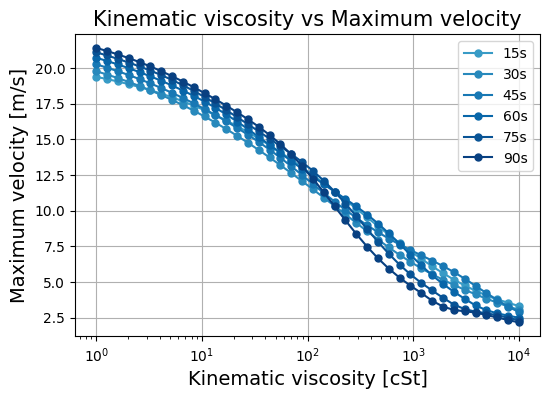

In [147]:
# plt.plot(cSt_list, max_u10)
# plt.plot(cSt_list, max_u5)
plt.figure(dpi=100) 
label = [f'{i}s' for i in np.array(t_search[28:190:30],dtype=int)]

# time_stamp = [20,40,60,80,100,200,8000]
int_ =np.linspace(0.7,1,len(label))
color = plt.cm.GnBu(int_)

# plt.plot(cSt_list, (np.array(en_max_u).T[18:100:20]).T,label = np.array(t_search[18:100:20],dtype=int)
for i in range(len(label)):
    plt.plot(cSt_list, (np.array(max_u).T[28:190:30]).T[:,i],label = label[i],marker='o',markersize=5,color=color[i])
# plt.set_cmap('YlOrRd')
# plt.plot(cSt_list, np.array(max_u).T[20]*3600/1000,'-o',markersize=5, label =t_search[20])
# plt.plot(cSt_list, np.array(max_u).T[40]*3600/1000,'-o',markersize=5, label =t_search[40])
# plt.plot(cSt_list, np.array(max_u_t),'-o',markersize=5) #label =t_search[40])
plt.legend()
plt.grid()
plt.xscale('log')
# plt.yscale('log')

plt.title('Kinematic viscosity vs Maximum velocity',fontsize= 15)

plt.xlabel('Kinematic viscosity [cSt]',fontsize=14)
plt.ylabel('Maximum velocity [m/s]',fontsize=14)

plt.savefig('ppt용/cSt vs Maximum verocity.png',dpi=400)

In [104]:
def fit_root(x,a,b):
    return a*(x**0.5) + b

In [105]:
popt,_ = curve_fit(fit_root,cSt_list,last_t_list,bounds = (0,[np.inf,np.inf]))

In [107]:
def plot(x,a):
    return a**x

In [113]:
def plot_x(x,a):
    return (x**(1/a))

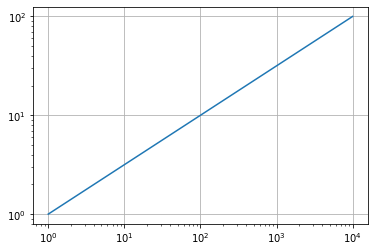

In [123]:
plt.plot(x,plot_x(x,2))
plt.xscale('log')
plt.yscale('log')
plt.grid()

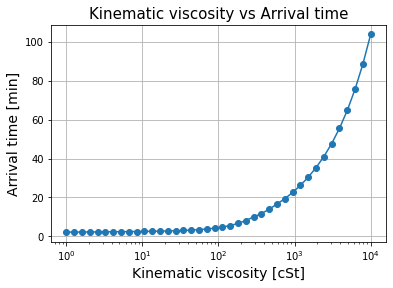

In [150]:
plt.plot(cSt_list,np.array(last_t_list)/60,marker='o')
# plt.plot(cSt_list,fit_root(cSt_list,*popt)/60)


plt.ylabel('Arrival time [min]',fontsize= 14)
plt.xlabel('Kinematic viscosity [cSt]',fontsize= 14)
plt.xscale('log')
# plt.yscale('log')
plt.title('Kinematic viscosity vs Arrival time',fontsize= 15)
plt.grid()
plt.savefig('ppt용/cSt vs Arrival tie.png',dpi=400)


In [121]:
x = np.linspace(1,10000,100000)

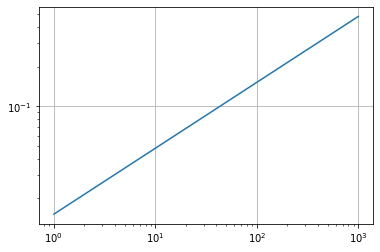

In [88]:
plt.plot(x,fit_root(x,*popt)/3600)
plt.xscale('log')
plt.yscale('log')
plt.grid()

# wave simulation

In [2]:
import shallow_water as sw
import wave_simulation as wav
import parmap
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

N_t =35000, last simulation time: 357.9118397125435
When arrive maximum speed 10.946510045524036s
When arrive maximum speed position 55.45545545545546m


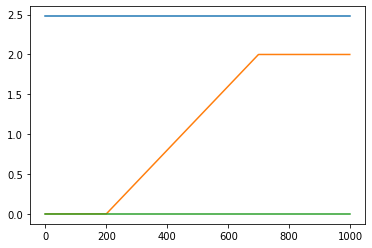

In [16]:
N_t = 35000
# t_search = np.arange(1,100+0.1,0.5)
max_ux,max_x,max_t,last_t = wav.sim_max_u_x(214,N_t,1)
print(f'N_t ={N_t}, last simulation time:',last_t)
print(f'When arrive maximum speed {max_t}s')
print(f'When arrive maximum speed position {max_x}m')


In [31]:
N_x = 1000
err = 1e-4
L_x = 1e+2
dx = L_x/(N_x - 1)
x = np.linspace(0,L_x,N_x)

In [5]:
cSt_list = np.logspace(0,4,200)
# cSt_list = np.linspace(1,10000,40)
# N_t = 36000
max_u_ensemble= []
last_t_list =  []


max_xs = []
max_ts = []
max_uxs =[]

for S in parmap.map(wav.sim_max_u_x,cSt_list,N_t,Draw=False,pm_pbar=True, pm_processes=10):
    max_ux,max_x,max_t,last_t = S       
    max_uxs.append(max_ux)
    max_xs.append(max_x)
    max_ts.append(max_t)
    # max_u5.append(np.max(u_check5))

100%|██████████| 200/200 [04:58<00:00,  1.49s/it]


In [6]:
max_xs

[78.27827827827828,
 78.07807807807808,
 77.87787787787788,
 77.77777777777779,
 77.57757757757759,
 77.37737737737739,
 77.17717717717719,
 76.97697697697699,
 76.87687687687688,
 76.67667667667668,
 76.47647647647648,
 76.37637637637638,
 76.17617617617618,
 76.07607607607608,
 75.87587587587588,
 75.77577577577578,
 75.57557557557558,
 75.47547547547548,
 75.27527527527528,
 75.17517517517518,
 75.07507507507508,
 74.87487487487488,
 74.77477477477478,
 74.67467467467468,
 74.47447447447448,
 74.37437437437438,
 74.27427427427428,
 74.17417417417418,
 74.07407407407408,
 73.87387387387388,
 73.87387387387388,
 73.77377377377378,
 73.57357357357358,
 73.47347347347348,
 73.37337337337338,
 73.27327327327328,
 73.17317317317318,
 73.07307307307308,
 73.07307307307308,
 72.97297297297298,
 72.87287287287288,
 72.77277277277278,
 72.67267267267268,
 72.57257257257258,
 72.47247247247248,
 72.47247247247248,
 72.37237237237238,
 72.27227227227228,
 72.17217217217218,
 72.07207207207207,


In [7]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [15]:
cSt_list[find_nearest_idx(np.array(max_xs),30)]

214.61411978584036

In [19]:
np.max(np.array(max_uxs),axis=1).shape

(200,)

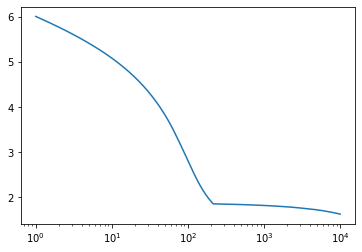

In [35]:
plt.plot(cSt_list,np.max(np.array(max_uxs),axis=1))#,marker='o',markersize=3)
# plt.plot(cSt_list,max_xs)

plt.xscale('log')
# plt.yscale('log')

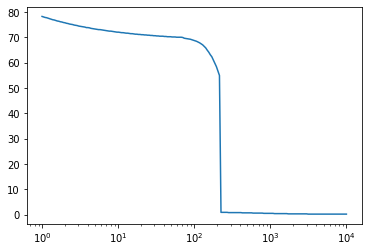

In [36]:
plt.plot(cSt_list,max_xs)
# plt.vlines(180,0,10)
# plt.plot(cSt_list,max_ts)

plt.xscale('log')

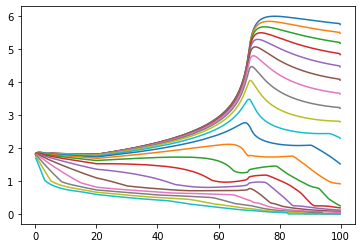

In [34]:
plt.plot(x[2:-2],np.array(max_uxs)[::10].T)